In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

# Initialize El client 3ashan ngeb mno el data
client = Client("IRIS")

# Parameteres
start_time = UTCDateTime("2022-01-02")  # Set start time
end_time = UTCDateTime("2022-01-03")    # Set end time
network = "XB"                          # InSight network
station = "ELYSE"                       # Station code da ely feh el readings ely bndwr 3leha
location = "02"                         # e7na 3ayzen 02
channel = "BHW,BHV,BHU"                 # Retrieve channels -> all 3 components of the seismometer

In [4]:
# Bnd5l el parameters hena *Note* Hata5od wa2t keter.
waveforms = client.get_waveforms(network, station, location, channel, start_time,end_time)

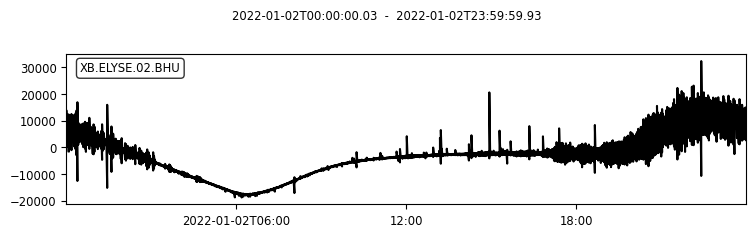

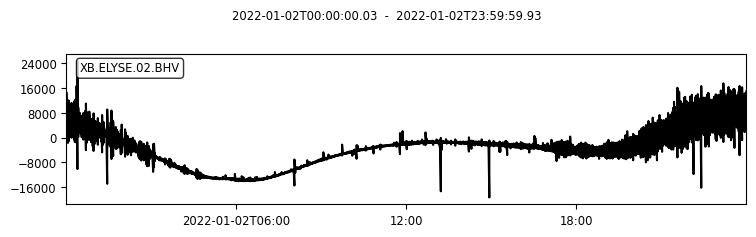

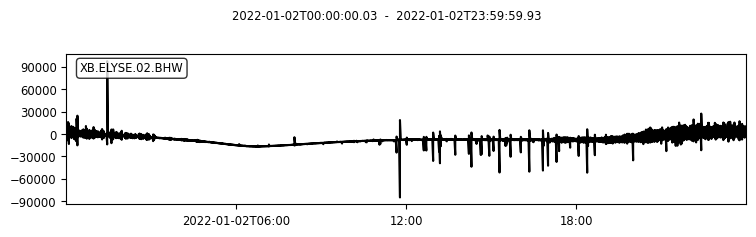

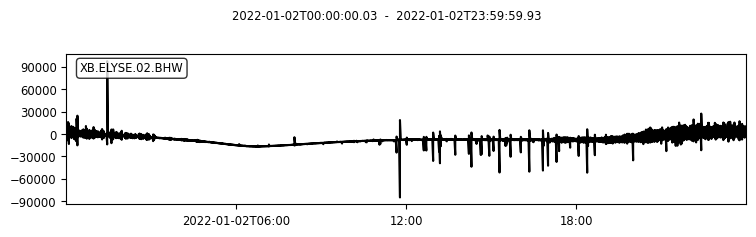

In [6]:
# Plot el data
waveforms[0].plot()
waveforms[1].plot()
waveforms[2].plot() # El zeft da byplot mrten mesh 3aref leh

In [8]:
traces = waveforms[0:3]  # Get the 3 traces

In [12]:
traces[0].data = spline(traces[0].data, 3,20*60*60*2)
traces[1].data = spline(traces[1].data, 3,20*60*60*2)
traces[2].data = spline(traces[2].data, 3,20*60*60*2)

In [50]:
2**15

32768

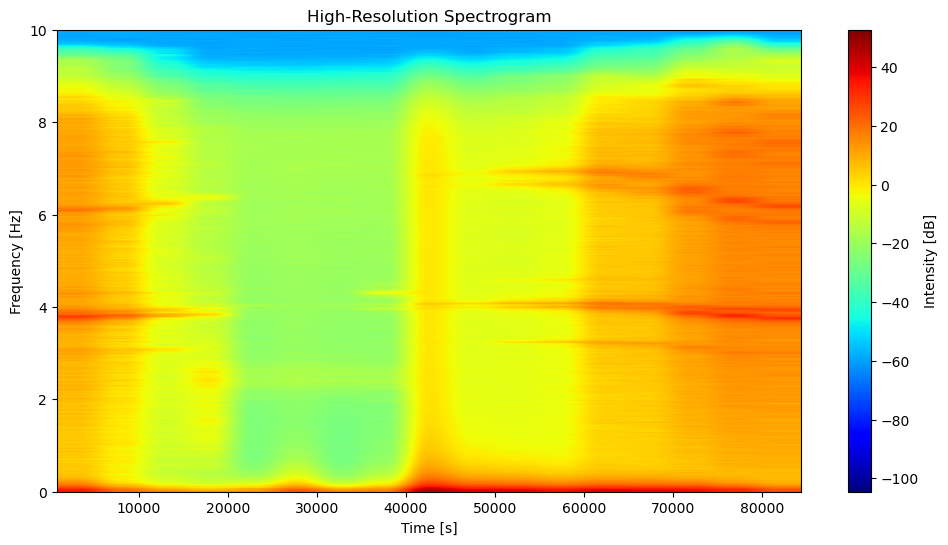

In [64]:
Fs = 20
trace = traces[2]
# Parameters for the spectrogram
NFFT = 2**17  # FFT size for good frequency resolution
noverlap = NFFT * 0.25  # 75% overlap for smooth transitions
window = np.blackman(NFFT)  # Hanning window to reduce spectral leakage

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.specgram(trace, NFFT=NFFT, Fs=Fs, noverlap=int(noverlap), window=window, scale_by_freq=False, cmap='jet')

# Adding labels and title
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('High-Resolution Spectrogram')
plt.colorbar(label='Intensity [dB]')

plt.show()

In [ ]:
Fs = 20
trace = traces[2]
# Parameters for the spectrogram
NFFT = 2**17  # FFT size for good frequency resolution
noverlap = NFFT * 0.25  # 75% overlap for smooth transitions
window = np.blackman(NFFT)  # Hanning window to reduce spectral leakage

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.specgram(trace, NFFT=NFFT, Fs=Fs, noverlap=int(noverlap), window=window, scale_by_freq=False, cmap='jet')

# Adding labels and title
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('High-Resolution Spectrogram')
plt.colorbar(label='Intensity [dB]')

plt.show()

In [54]:
20*60*60*24

1728000

In [26]:
from scipy.signal import medfilt
from scipy.signal import welch
from scipy.ndimage import gaussian_filter1d

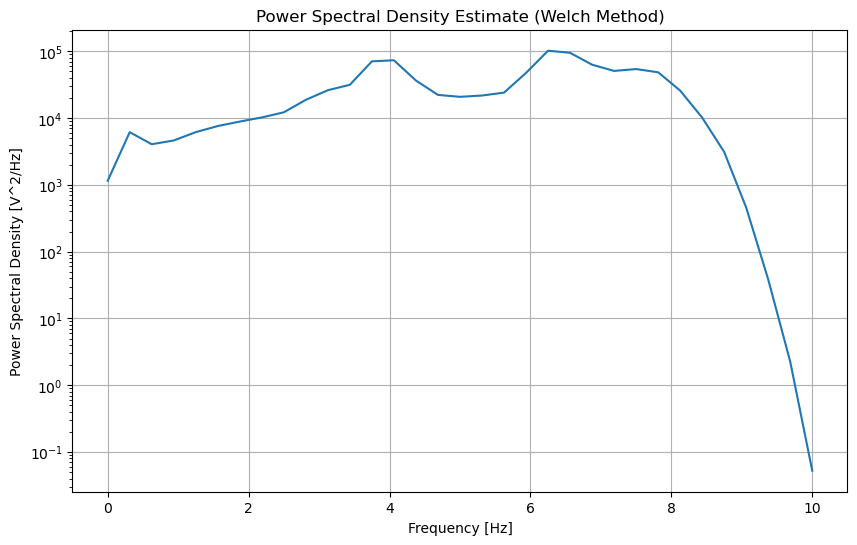

In [36]:
f, Pxx = welch(traces[0].data, fs=Fs, nperseg=64, window='blackman', noverlap=64*.5,nfft=64,scaling='spectrum')
    # Plot the periodogram
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx)  # Use semilogy for better visualization in log scale
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [V^2/Hz]')
plt.title('Power Spectral Density Estimate (Welch Method)')
plt.grid(True)
plt.show()